In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [8]:
emission = pd.read_csv('/content/content/MyDrive/Capstone_Project/Datasets/agri_emission.csv', encoding = 'latin-1')

In [9]:
emission.head()

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,356,India,7234,Direct emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,27.8120,E,Estimated value,NaN
1,GT,Emissions Totals,356,India,7236,Indirect emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,6.2577,E,Estimated value,NaN
2,GT,Emissions Totals,356,India,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,34.0697,E,Estimated value,NaN
3,GT,Emissions Totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN
4,GT,Emissions Totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN


In [10]:
emission.tail()

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
5410,GT,Emissions Totals,356,India,7230,Emissions (N2O),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,68.6,E,Estimated value,NaN
5411,GT,Emissions Totals,356,India,7273,Emissions (CO2),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,14200.0,E,Estimated value,NaN
5412,GT,Emissions Totals,356,India,724413,Emissions (CO2eq) from CH4 (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,1260.0,E,Estimated value,NaN
5413,GT,Emissions Totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,18179.0,E,Estimated value,NaN
5414,GT,Emissions Totals,356,India,723113,Emissions (CO2eq) (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,33639.0,E,Estimated value,NaN


In [11]:
emission.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Source Code,Value,Note
count,5415.0,5415.000000,5415.000000,5415.000000,5415.000000,5415.0,5.415000e+03,0.0
mean,356.0,379862.232318,9612.474792,1999.216066,1999.216066,3050.0,3.824558e+04,NaN
std,0.0,358013.188499,14565.152744,14.770797,14.770797,0.0,1.765781e+05,NaN
min,356.0,7225.000000,5058.000000,1961.000000,1961.000000,3050.0,-2.273969e+05,NaN
25%,356.0,7230.000000,5063.000000,1992.000000,1992.000000,3050.0,2.514070e+01,NaN
50%,356.0,723113.000000,6507.000000,2001.000000,2001.000000,3050.0,6.835444e+02,NaN
75%,356.0,724313.000000,6818.000000,2011.000000,2011.000000,3050.0,1.353032e+04,NaN
max,356.0,724413.000000,69921.000000,2020.000000,2020.000000,3050.0,2.630058e+06,NaN


In [12]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿Domain Code    5415 non-null   object 
 1   Domain            5415 non-null   object 
 2   Area Code (M49)   5415 non-null   int64  
 3   Area              5415 non-null   object 
 4   Element Code      5415 non-null   int64  
 5   Element           5415 non-null   object 
 6   Item Code         5415 non-null   int64  
 7   Item              5415 non-null   object 
 8   Year Code         5415 non-null   int64  
 9   Year              5415 non-null   int64  
 10  Source Code       5415 non-null   int64  
 11  Source            5415 non-null   object 
 12  Unit              5415 non-null   object 
 13  Value             5415 non-null   float64
 14  Flag              5415 non-null   object 
 15  Flag Description  5415 non-null   object 
 16  Note              0 non-null      float64


In [13]:
emission = emission.drop(['ï»¿Domain Code','Domain','Area Code (M49)','Area','Year Code','Source Code','Source','Flag','Flag Description','Note'],axis=1)

In [14]:
emission.head()

,Element Code,Element,Item Code,Item,Year,Unit,Value
0,7234,Direct emissions (N2O),5064,Crop Residues,1961,kilotonnes,27.8120
1,7236,Indirect emissions (N2O),5064,Crop Residues,1961,kilotonnes,6.2577
2,7230,Emissions (N2O),5064,Crop Residues,1961,kilotonnes,34.0697
3,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,kilotonnes,9028.4589
4,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,kilotonnes,9028.4589


<Axes: ylabel='Element'>

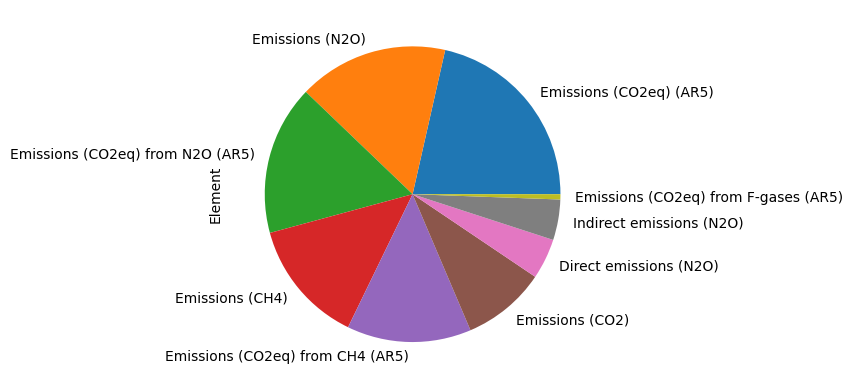

In [15]:
emission['Element'].value_counts().plot(kind='pie')

F - gases -> Flourinated Gases are man-made gases used in a range of industrial applications.

CO2eq -> A carbon dioxide equivalent or CO2 equivalent, abbreviated as CO2-eq is a metric measure used to compare the emissions from various greenhouse gases on the basis of their global-warming potential (GWP)

<Axes: ylabel='Element'>

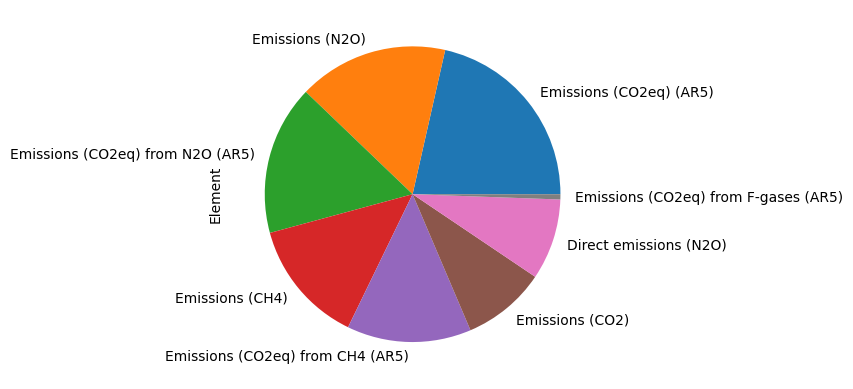

In [16]:
# Removing the 'Indirect Emission (N2O)' Element instance inorder to reduce the dimension
emission['Element'] = emission['Element'].replace('Indirect emissions (N2O)','Direct emissions (N2O)')
# plotting a pie chart to see the Element count distribution
emission['Element'].value_counts().plot(kind="pie")

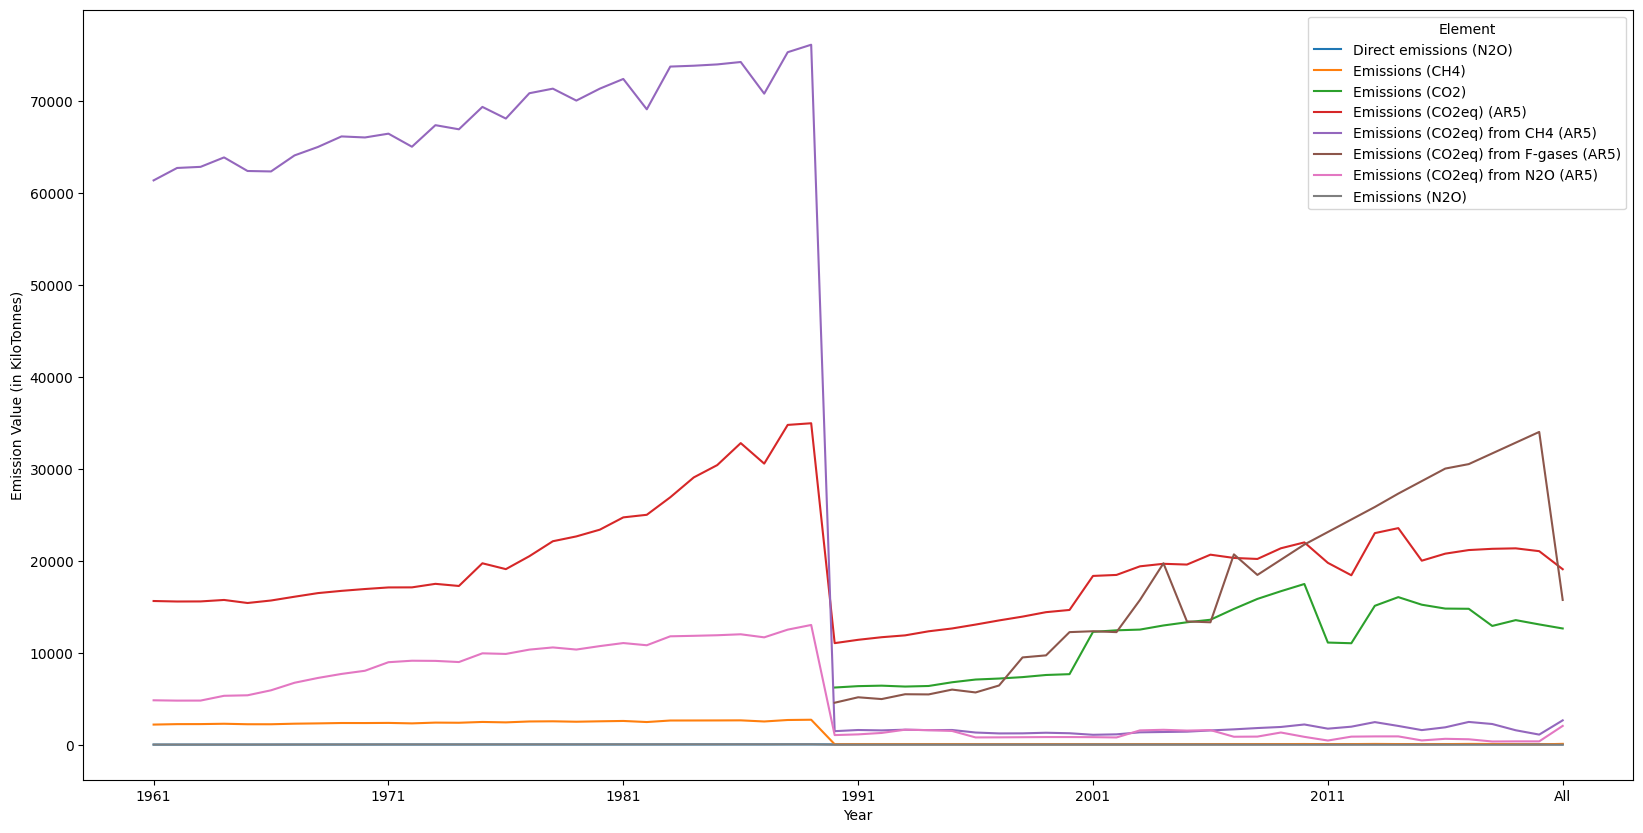

In [21]:
temp = emission.pivot_table('Value', index='Year',columns=['Element'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("Year")

fig, ax = plt.subplots(figsize=(20, 10))

temp.plot(ax=ax)

# Add labels to axes
ax.set_ylabel('Emission Value (in KiloTonnes)')  # Add the appropriate unit for emission values
ax.set_xlabel('Year')

plt.show()

### Stations_Emission_Hourly

In [ ]:
station_hour.head()

In [ ]:
station_hour.tail()

In [ ]:
station_hour.info()

In [ ]:
#converting column Date into DateTime format
station_hour['Datetime']=pd.to_datetime(station_hour['Datetime'])

station_hour['Datetime'] = pd.to_datetime(station_hour['Datetime'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
station_hour.info()

In [ ]:
# Printing the number of N/A values in each columns of station_hour dataset
print(station_hour.isna().sum())

# Graphical representation of the na values present in the attribute - bar graph
station_hour.isna().sum().plot.barh()

In [ ]:
msno.heatmap(station_hour)

In [ ]:
df1 = station_hour.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [ ]:
# Printing the number of N/A values in each columns of station_hour dataset
print(df1.isna().sum())

In [ ]:
stations.head()

In [ ]:
stations.tail()

In [ ]:
stations.describe()

In [ ]:
stations.info()

In [ ]:
df1 = df1.drop(['StationId', 'AQI_Bucket'],axis=1)

In [ ]:
df1.info()

In [ ]:
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (y)
X = df1.drop(columns=['AQI','Datetime'])
y = df1['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have defined X_train and y_train

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

try:
    grid_search.fit(X_train, y_train)
except ValueError as e:
    print("Error occurred during grid search:")
    print(e)

# Get the best k value from the grid search
best_k = grid_search.best_params_['n_neighbors']
print("Best value of k:", best_k)
